In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.neighbors import KNeighborsRegressor as KR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
data = pd.read_csv("bb_2000s_train.csv")  # read the csv file using pandas 
data.head() # to see the first five dataset 

,Artist,Track,Year,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Label
0,shawn colvin,these four walls,2006,1,0.470,0.506,9,-7.976,1,0.0308,0.490000,0.000035,0.378,0.376,165.339,0
1,billy dean,let them be little,2005,0,0.540,0.516,1,-5.221,1,0.0246,0.266000,0.000000,0.204,0.285,135.900,1
2,eminem,the way i am,2000,0,0.810,0.871,4,-2.672,0,0.2410,0.130000,0.000000,0.313,0.299,87.328,0
3,my chemical romance,na na na (na na na na na na na na na),2010,1,0.411,0.986,8,-2.522,0,0.0583,0.000264,0.001480,0.371,0.649,165.981,1
4,luiz bonfa,samba de duas notas,2008,0,0.629,0.227,2,-19.621,1,0.0574,0.830000,0.009700,0.122,0.736,157.309,0


In [3]:
data.tail() # to see last five dataset

,Artist,Track,Year,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Label
1886,aaron neville,everybody plays the fool,2000,0,0.799,0.464,10,-9.789,1,0.1180,0.33200,0.006000,0.086,0.432,87.901,1
1887,the fever,bye bye betty blue,2006,0,0.251,0.879,10,-3.896,1,0.0821,0.02100,0.000616,0.164,0.468,144.560,0
1888,moving ninja,lost tribe,2005,0,0.788,0.714,1,-9.249,1,0.0975,0.00348,0.679000,0.322,0.476,135.038,0
1889,outerspace,drive by music,2006,0,0.791,0.821,8,-5.299,0,0.2460,0.24200,0.000000,0.110,0.582,90.980,0
1890,jack johnson,"sitting, waiting, wishing",2005,0,0.764,0.559,0,-7.153,1,0.0265,0.24700,0.000030,0.125,0.627,105.021,1


In [4]:
data.shape # rows * columns

(1891, 16)

In [5]:
data.size # 1891*16 = 30256 no of elements in the data 

30256

In [6]:
data.count() # Total no of iteams per columns 

Artist              1891
Track               1891
Year                1891
PreviousHit         1891
Danceability        1891
Energy              1891
Key                 1891
Loudness            1891
Mode                1891
Speechiness         1891
Acousticness        1891
Instrumentalness    1891
Liveness            1891
Valence             1891
Tempo               1891
Label               1891
dtype: int64

In [7]:
feature_svm  = data[['PreviousHit', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo']] # drop the columns which are not contribute in testing and training
target_svm = data["Label"] # Storing the output in the target 

count=0
for i in target_svm:
    count+=1
print(count)

1891


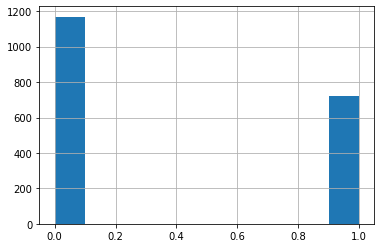

In [8]:
target_svm.hist() # to see the distrinustion of lable dataset 
# from the plot you can see that we have more data for zero then 1. 

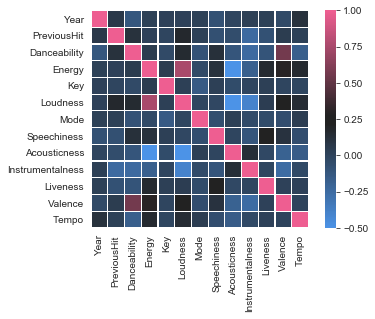

In [9]:
sns.set_style("darkgrid")
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

**Standardization (feature scaling):  It ensures that all variables have a similar range and distribution, which is crucial for various machine learning algorithms that assume equal importance among features.**

In [10]:
scaler = StandardScaler()
scaler.fit(feature_svm)
standardized_data = scaler.transform(feature_svm)
feature_svm=standardized_data
feature_svm

array([[ 1.69324412, -0.45453515, -0.8101497 , ...,  0.95886115,
        -0.47763924,  1.47028813],
       [-0.59058229, -0.07168036, -0.76567759, ..., -0.02029683,
        -0.8362152 ,  0.48269567],
       [-0.59058229,  1.40504529,  0.81308236, ...,  0.59308374,
        -0.78104967, -1.14675306],
       ...,
       [-0.59058229,  1.28471949,  0.11487022, ...,  0.64372984,
        -0.08359972,  0.45377809],
       [-0.59058229,  1.30112756,  0.59072181, ..., -0.54926723,
         0.33408216, -1.02423912],
       [-0.59058229,  1.15345499, -0.57444751, ..., -0.46485706,
         0.51139995, -0.55320459]])

**With the RandomizedSearchCV() function shown below, we specify an n_iter value. This represents the number of unique hyperparameter combinations to check. The 50 unique combinations specified here represent one-fourth of the total area on the full grid. The randomized search delivered our results in just few seconds but it can very by computer processor**

**1. Support Vector Machines (SVM):**

**SVM has High-Dimensional Capability. SVM excels in handling data with many dimensions, pattern recognition, and making it suitable for both linear and non-linear datasets.** 


In [11]:
from sklearn.model_selection import RandomizedSearchCV


X_train, X_test, Y_train, Y_test = train_test_split(feature_svm, target_svm, test_size=0.2,random_state=42)#,stratify=target)

from scipy.stats import reciprocal
from sklearn.svm import SVC

# Define the parameter grid
param_dist = {
     'C':[11,12,13,14,15],
    'kernel': ['poly', 'sigmoid'],  # Type of kernel
    'degree': [2, 3, 4, 6],  # Degree of the polynomial kernel (only for poly)
    'gamma': ['scale',"auto"],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}


clf = SVC()
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50 # no of model to try
                                   , cv=5, 
                                   verbose=2,
                                   random_state=42)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, Y_train)

# Print the best parameters found
print("Best Parameters: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] kernel=poly, gamma=auto, degree=6, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=6, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=6, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=6, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=6, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=6, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=6, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=6, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=6, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=6, C=12, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=2, C=11 ........................
[CV] ......... kernel=poly, gamma=scale, degree=2, C=11, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=2, C=11 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... kernel=poly, gamma=scale, degree=2, C=11, total=   0.1s
[CV] kernel=poly, gamma=scale, degree=2, C=11 ........................
[CV] ......... kernel=poly, gamma=scale, degree=2, C=11, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=2, C=11 ........................
[CV] ......... kernel=poly, gamma=scale, degree=2, C=11, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=2, C=11 ........................
[CV] ......... kernel=poly, gamma=scale, degree=2, C=11, total=   0.1s
[CV] kernel=poly, gamma=auto, degree=3, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=3, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=3, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=3, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=3, C=12 .........................
[CV] .......... kernel=poly, gamma=auto, degree=3, C=12, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=3, C=12 .........................
[CV] .

[CV] ....... kernel=sigmoid, gamma=auto, degree=2, C=13, total=   0.0s
[CV] kernel=sigmoid, gamma=auto, degree=2, C=13 ......................
[CV] ....... kernel=sigmoid, gamma=auto, degree=2, C=13, total=   0.0s
[CV] kernel=sigmoid, gamma=auto, degree=2, C=13 ......................
[CV] ....... kernel=sigmoid, gamma=auto, degree=2, C=13, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=3, C=15 ........................
[CV] ......... kernel=poly, gamma=scale, degree=3, C=15, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=3, C=15 ........................
[CV] ......... kernel=poly, gamma=scale, degree=3, C=15, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=3, C=15 ........................
[CV] ......... kernel=poly, gamma=scale, degree=3, C=15, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=3, C=15 ........................
[CV] ......... kernel=poly, gamma=scale, degree=3, C=15, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=3, C=15 ........................
[CV] .

[CV] .......... kernel=poly, gamma=auto, degree=6, C=14, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=6, C=14 .........................
[CV] .......... kernel=poly, gamma=auto, degree=6, C=14, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=4, C=13 .........................
[CV] .......... kernel=poly, gamma=auto, degree=4, C=13, total=   0.1s
[CV] kernel=poly, gamma=auto, degree=4, C=13 .........................
[CV] .......... kernel=poly, gamma=auto, degree=4, C=13, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=4, C=13 .........................
[CV] .......... kernel=poly, gamma=auto, degree=4, C=13, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=4, C=13 .........................
[CV] .......... kernel=poly, gamma=auto, degree=4, C=13, total=   0.1s
[CV] kernel=poly, gamma=auto, degree=4, C=13 .........................
[CV] .......... kernel=poly, gamma=auto, degree=4, C=13, total=   0.1s
[CV] kernel=poly, gamma=auto, degree=3, C=14 .........................
[CV] .

[CV] ......... kernel=poly, gamma=scale, degree=6, C=13, total=   0.1s
[CV] kernel=poly, gamma=scale, degree=6, C=13 ........................
[CV] ......... kernel=poly, gamma=scale, degree=6, C=13, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=6, C=13 ........................
[CV] ......... kernel=poly, gamma=scale, degree=6, C=13, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=6, C=13 ........................
[CV] ......... kernel=poly, gamma=scale, degree=6, C=13, total=   0.0s
[CV] kernel=sigmoid, gamma=scale, degree=6, C=11 .....................
[CV] ...... kernel=sigmoid, gamma=scale, degree=6, C=11, total=   0.0s
[CV] kernel=sigmoid, gamma=scale, degree=6, C=11 .....................
[CV] ...... kernel=sigmoid, gamma=scale, degree=6, C=11, total=   0.0s
[CV] kernel=sigmoid, gamma=scale, degree=6, C=11 .....................
[CV] ...... kernel=sigmoid, gamma=scale, degree=6, C=11, total=   0.0s
[CV] kernel=sigmoid, gamma=scale, degree=6, C=11 .....................
[CV] .

Best Parameters:  {'kernel': 'poly', 'gamma': 'scale', 'degree': 2, 'C': 11}


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    9.8s finished


In [12]:
from sklearn import svm

X_train_svm_p, X_test_svm_p, Y_train_svm_p, Y_test_svm_p = train_test_split(feature_svm , target_svm , test_size=0.20,random_state=42)#,stratify=target)               
classifier_svm_p= svm.SVC(kernel= "poly",gamma="scale", degree= 3,C=11)
classifier_svm_p.fit(X_train_svm_p,Y_train_svm_p)
Y_pre_svm_p = classifier_svm_p.predict(X_test_svm_p)
y_pred_svm_p = classifier_svm_p.decision_function(X_test_svm_p)
#print(len(X_test_svm_p))
#print(len(X_train_svm_p))

accuracy_svm_p = accuracy_score(Y_test_svm_p, Y_pre_svm_p)
print("accuracy score : ", accuracy_svm_p*100)
print("confusion_matrix",confusion_matrix(Y_test_svm_p, Y_pre_svm_p))
print(classification_report(Y_test_svm_p, Y_pre_svm_p))



accuracy score :  80.21108179419525
confusion_matrix [[213  26]
 [ 49  91]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       239
           1       0.78      0.65      0.71       140

    accuracy                           0.80       379
   macro avg       0.80      0.77      0.78       379
weighted avg       0.80      0.80      0.80       379



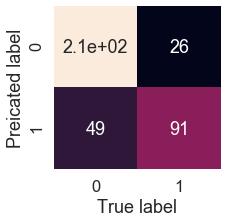

In [13]:
sns.set(font_scale=1.5)

conf_mat=confusion_matrix(Y_test_svm_p, Y_pre_svm_p)

#sns.heatmap(conf_mat) 

def plot_conf_mat(conf_mat):
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Preicated label")
    
plot_conf_mat(conf_mat)

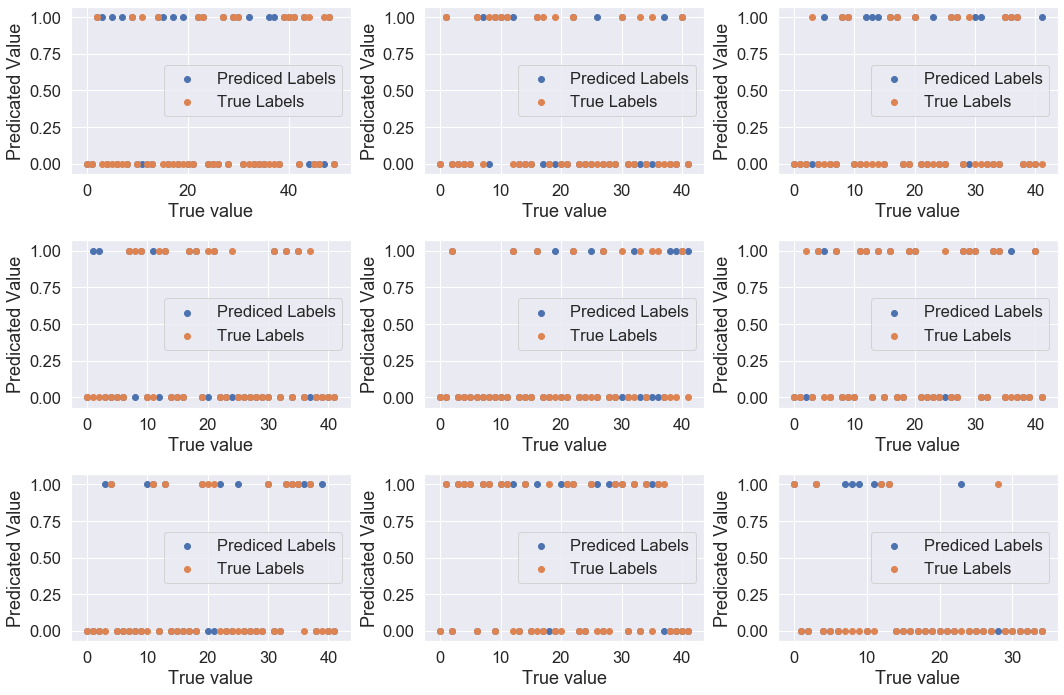

In [14]:
'''from the confusion matrix you can see that total 75 times,
we have misclassifies the output so if you count the blue dot 
in below graph: you will count 75 blue dots.'''

#
import matplotlib.pyplot as plt


# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(15,10))

a=0
b=50
# Plot the scatter plots in the first 9 subplots
for i in range(3):
    for j in range(3):
       
        axs[i, j].scatter(range(len(Y_test_svm_p[a:b])), Y_test_svm_p[a:b], label='Prediced Labels')
        axs[i, j].scatter(range(len(Y_pre_svm_p[a:b])), Y_pre_svm_p[a:b], label='True Labels')
        axs[i, j].set_xlabel("True value")
        axs[i, j].set_ylabel("Predicated Value")
        axs[i, j].legend()
        a=b
        b+=42

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [15]:
#print(feature.shape, X_train.shape, X_test.shape)

In [16]:
test_data = pd.read_csv("bb_2000s_test.csv")
test_data.head()

,PreviousHit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1,0.663,0.821,7,-4.557,1,0.0356,0.22900,0.000,0.2950,0.849,98.001
1,0,0.408,0.943,2,-4.675,1,0.0573,0.00251,0.908,0.3430,0.131,187.526
2,0,0.657,0.929,11,-7.104,0,0.0757,0.12400,0.000,0.0932,0.885,97.862
3,0,0.356,0.646,8,-11.852,1,0.0454,0.02200,0.760,0.1080,0.147,169.956
4,1,0.787,0.583,11,-7.160,0,0.1760,0.04380,0.000,0.2820,0.706,101.960


In [17]:
# change the input data to numpy array
input_data_svm = np.asarray(test_data)
#print(input_data)
# standardizing the input data
std_data_svm = scaler.transform(input_data_svm)
#print(std_data)

prediction_svm = classifier_svm_p.predict(std_data_svm)
print(prediction_svm)

[1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1]


**2.  Decision tree:**

**We choose method because they are non-parametric, meaning they do not make assumptions about the underlying distribution of the data. This makes them useful when the data is not normally distributed or when there are outliers (we have a data set that is not normally distributed which makes it a suitable method for this project).**



In [18]:
feature_D_C = data[['PreviousHit', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
target_D_C = data["Label"]

In [19]:
scaler = StandardScaler()
scaler.fit(feature_D_C)
standardized_data = scaler.transform(feature_D_C)
feature_D_C = standardized_data
feature_D_C

array([[ 1.69324412, -0.45453515, -0.8101497 , ...,  0.95886115,
        -0.47763924,  1.47028813],
       [-0.59058229, -0.07168036, -0.76567759, ..., -0.02029683,
        -0.8362152 ,  0.48269567],
       [-0.59058229,  1.40504529,  0.81308236, ...,  0.59308374,
        -0.78104967, -1.14675306],
       ...,
       [-0.59058229,  1.28471949,  0.11487022, ...,  0.64372984,
        -0.08359972,  0.45377809],
       [-0.59058229,  1.30112756,  0.59072181, ..., -0.54926723,
         0.33408216, -1.02423912],
       [-0.59058229,  1.15345499, -0.57444751, ..., -0.46485706,
         0.51139995, -0.55320459]])

In [20]:
X_train_D_C, X_test_D_C, Y_train_D_C, Y_test_D_C = train_test_split(feature_D_C, target_D_C, test_size=0.2, random_state = 42)

In [21]:
DecisionTree_Classifier = DecisionTreeClassifier(criterion= "entropy",splitter="best",max_leaf_nodes=2, random_state=42)
DecisionTree_Classifier.fit(X_train_D_C, Y_train_D_C)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [22]:
y_predicted_D_C = DecisionTree_Classifier.predict(X_test_D_C)
accuracy_D_C = accuracy_score(Y_test_D_C, y_predicted_D_C)
print(accuracy_D_C*100)
print(confusion_matrix(Y_test_D_C, y_predicted_D_C))
print(classification_report(Y_test_D_C, y_predicted_D_C))

79.41952506596306
[[221  18]
 [ 60  80]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       239
           1       0.82      0.57      0.67       140

    accuracy                           0.79       379
   macro avg       0.80      0.75      0.76       379
weighted avg       0.80      0.79      0.78       379



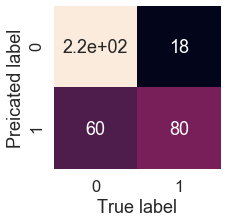

In [23]:
plot_conf_mat(confusion_matrix(Y_test_D_C, y_predicted_D_C))

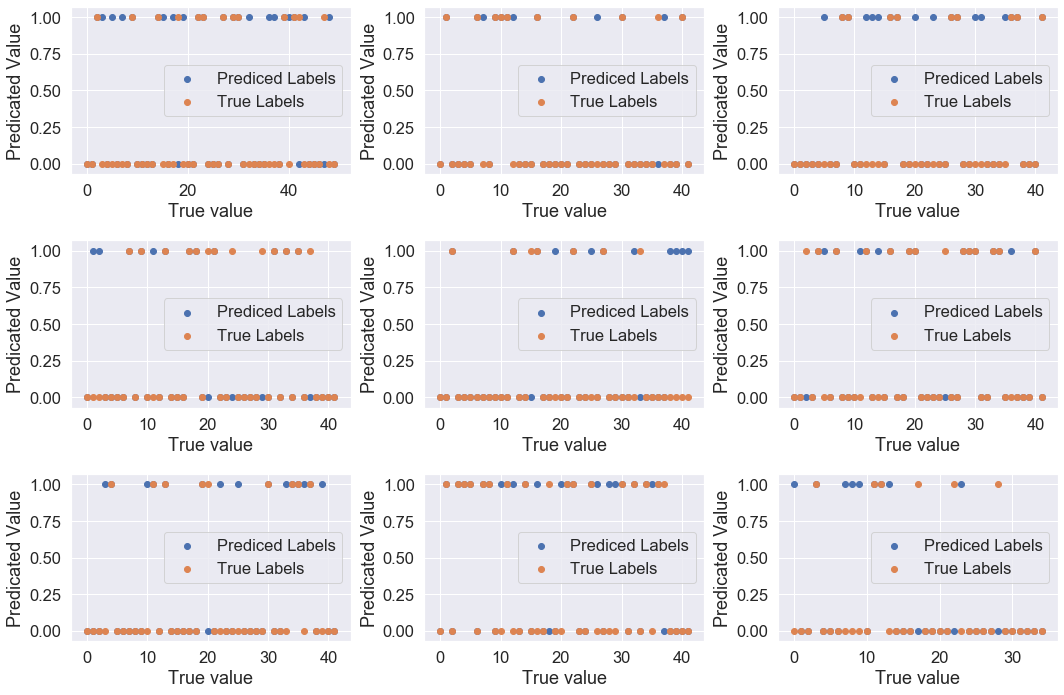

In [24]:
'''from the confusion matrix you can see that total 78 times,
we have misclassifies the output so if you count the blue dot 
in below graph: you will count 78 blue dots.'''

#
import matplotlib.pyplot as plt


# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(15,10))

a=0
b=50
# Plot the scatter plots in the first 9 subplots
for i in range(3):
    for j in range(3):
        
        axs[i, j].scatter(range(len(Y_test_D_C[a:b])), Y_test_D_C[a:b], label='Prediced Labels')
        axs[i, j].scatter(range(len(y_predicted_D_C[a:b])), y_predicted_D_C[a:b], label='True Labels')
        axs[i, j].set_xlabel("True value")
        axs[i, j].set_ylabel("Predicated Value")
        axs[i, j].legend()
        a=b
        b+=42

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

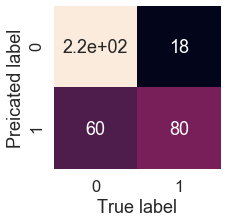

In [25]:
plot_conf_mat(confusion_matrix(Y_test_D_C, y_predicted_D_C))

In [26]:
# change the input data to numpy array
input_data = np.asarray(test_data)
scaler = StandardScaler()
scaler.fit(input_data)
feature_D_C = scaler.transform(input_data)
print("test data shape : ",feature_D_C.shape)
prediction_D_C = DecisionTree_Classifier.predict(feature_D_C)
print(prediction_D_C)

test data shape :  (211, 12)
[1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1]


**3. Naïve Bayes:
It is part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. This approach assumes that the features of the input data are conditionally independent given the class, allowing the algorithm to make predictions quickly and accurately. It is Very fast – no iterations are required and Works well with high-dimensional data.** 


In [27]:
'''
#below code to see see how other model works such as gussianNB() and BermoulliNB(), we get 77% and 80% accuary respectively.

feature_NB = data[['PreviousHit', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
target_NB=data[["Label"]]

X_train_NB, X_test_NB, Y_train_NB, Y_test_NB = train_test_split(feature_NB, target_NB, test_size=0.2,random_state=42)

print(feature_NB.shape, X_train_NB.shape, X_test_NB.shape)
print(X_train_NB[0:1][0:1])
print(feature_NB[0:1][0:1])

gnb = GaussianNB()
y_pred_gB = gnb.fit(X_train_NB, Y_train_NB).predict(X_test_NB)
print(accuracy_score(Y_test_NB, y_pred_gB)*100)
print(confusion_matrix(Y_test_NB, y_pred_gB))
print(classification_report(Y_test_NB, y_pred_gB))

clf = BernoulliNB()
y_pred_B = clf.fit(X_train_NB, Y_train_NB).predict(X_test_NB)
print(accuracy_score(Y_test_NB, y_pred_B)*100)
print(confusion_matrix(Y_test_NB, y_pred_B))
print(classification_report(Y_test_NB, y_pred_B))'''

'\n#below code to see see how other model works such as gussianNB() and BermoulliNB(), we get 77% and 80% accuary respectively.\n\nfeature_NB = data[[\'PreviousHit\', \'Danceability\', \'Energy\',\n       \'Key\', \'Loudness\', \'Mode\', \'Speechiness\', \'Acousticness\',\n       \'Instrumentalness\', \'Liveness\', \'Valence\', \'Tempo\']]\ntarget_NB=data[["Label"]]\n\nX_train_NB, X_test_NB, Y_train_NB, Y_test_NB = train_test_split(feature_NB, target_NB, test_size=0.2,random_state=42)\n\nprint(feature_NB.shape, X_train_NB.shape, X_test_NB.shape)\nprint(X_train_NB[0:1][0:1])\nprint(feature_NB[0:1][0:1])\n\ngnb = GaussianNB()\ny_pred_gB = gnb.fit(X_train_NB, Y_train_NB).predict(X_test_NB)\nprint(accuracy_score(Y_test_NB, y_pred_gB)*100)\nprint(confusion_matrix(Y_test_NB, y_pred_gB))\nprint(classification_report(Y_test_NB, y_pred_gB))\n\nclf = BernoulliNB()\ny_pred_B = clf.fit(X_train_NB, Y_train_NB).predict(X_test_NB)\nprint(accuracy_score(Y_test_NB, y_pred_B)*100)\nprint(confusion_matri

In [28]:
feature_NB = data[['PreviousHit', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
target_NB = data[["Label"]]

**Min-Max Scaling (MinMaxScaler): This technique scales data to a specified range, typically between 0 and 1. It subtracts the minimum value and divides it by the range (maximum—minimum). We use this for Naïve Bayes because it can’t use the feature value with a negative values. **

In [29]:
scaler = MinMaxScaler()
scaler.fit(feature_NB)
feature_NB = scaler.transform(feature_NB)
feature_NB.shape 

(1891, 12)

In [30]:
print(feature_NB)

[[1.         0.48958333 0.49974581 ... 0.38689867 0.37903226 0.79450179]
 [0.         0.5625     0.50991357 ... 0.20880246 0.28729839 0.65303887]
 [0.         0.84375    0.87086934 ... 0.32036847 0.30141129 0.41963634]
 ...
 [0.         0.82083333 0.71123538 ... 0.32958035 0.47983871 0.64889671]
 [0.         0.82395833 0.8200305  ... 0.11258956 0.58669355 0.43718525]
 [0.         0.79583333 0.55363498 ... 0.12794268 0.63205645 0.50465633]]


[Text(0.5, 0, 'Tempo')]

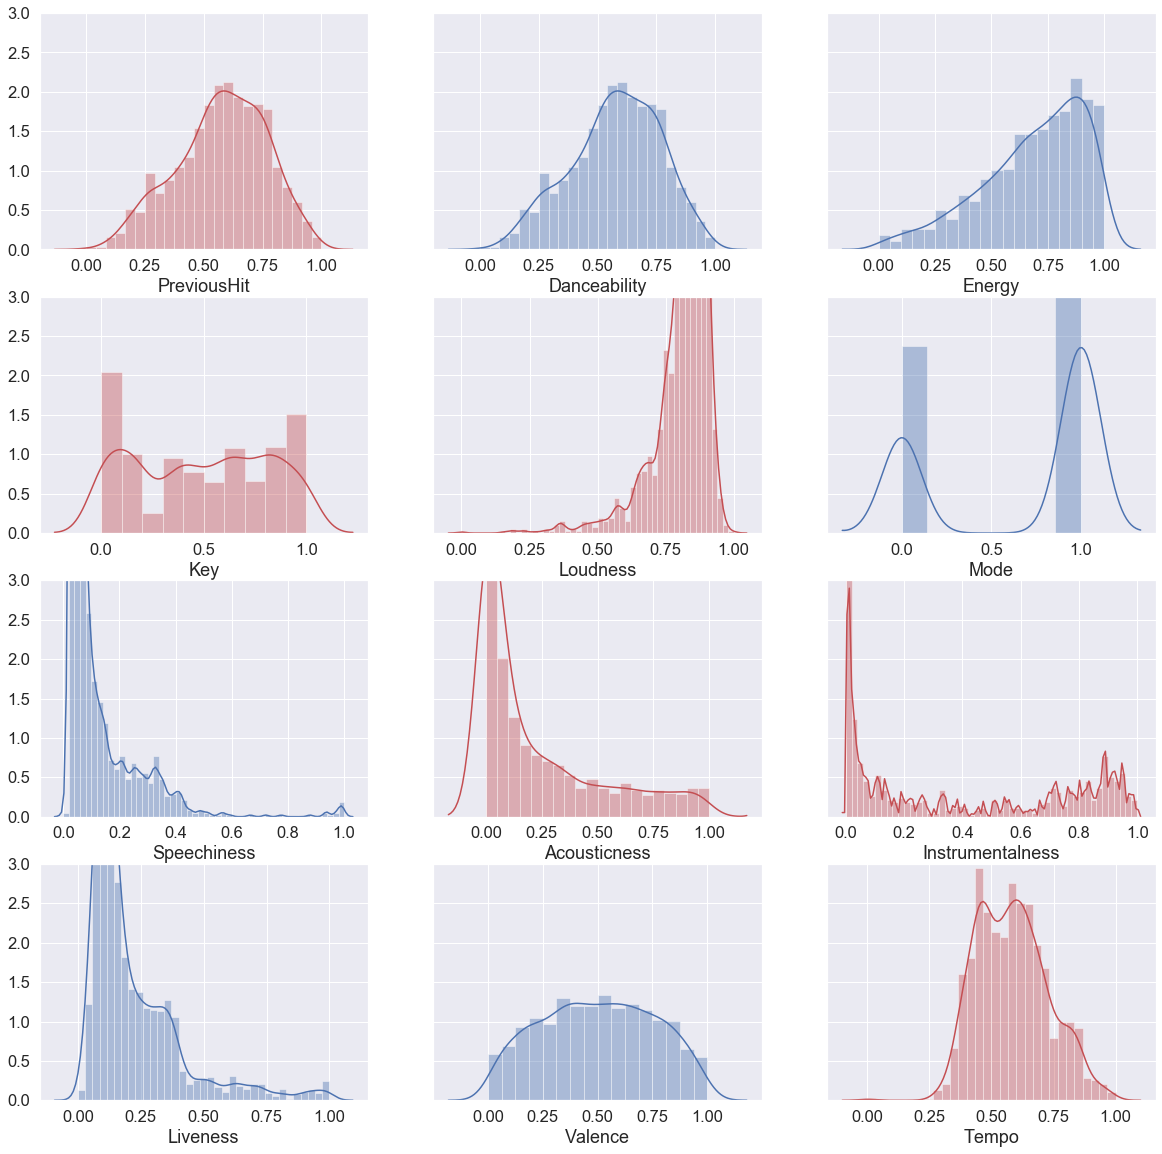

In [31]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20), sharey=True)
sns.distplot(feature_NB[:, 1], ax=axes[0][0], kde=True, color='r').set(xlabel='PreviousHit')
axes[0][0].set_ylim(0, 3)
sns.distplot(feature_NB[:,1:2], ax=axes[0][1], kde=True).set(xlabel='Danceability')
sns.distplot(feature_NB[:,2:3], ax=axes[0][2], kde=True).set(xlabel='Energy')
sns.distplot(feature_NB[:,3:4], ax=axes[1][0], kde=True, color='r').set(xlabel='Key')
sns.distplot(feature_NB[:,4:5], ax=axes[1][1], kde=True, color='r').set(xlabel='Loudness')
sns.distplot(feature_NB[:,5:6], ax=axes[1][2], kde=True, color='b').set(xlabel='Mode')
sns.distplot(feature_NB[:,6:7], ax=axes[2][0], kde=True).set(xlabel='Speechiness')
sns.distplot(feature_NB[:,7:8], ax=axes[2][1], kde=True, color='r').set(xlabel='Acousticness')
sns.distplot(feature_NB[:,8:9], ax=axes[2][2], kde=True, color='r').set(xlabel='Instrumentalness')
sns.distplot(feature_NB[:,9:10], ax=axes[3][0], kde=True, color='b').set(xlabel='Liveness')
sns.distplot(feature_NB[:,10:11], ax=axes[3][1], kde=True).set(xlabel='Valence')
sns.distplot(feature_NB[:,11:12], ax=axes[3][2], kde=True, color='r').set(xlabel='Tempo')

In [32]:
X_train_N_B, X_test_N_B, Y_train_N_B, Y_test_N_B = train_test_split(feature_NB,
                                    target_NB, test_size=0.2, random_state=42)

In [33]:
print(feature_NB.shape, X_train_N_B.shape, X_test_N_B.shape)
print(X_train_N_B[0:1][0:1])
print(feature_NB[0:1][0:1])

(1891, 12) (1512, 12) (379, 12)
[[0.         0.63020833 0.04311134 0.18181818 0.49390488 0.
  0.36401674 0.95983931 0.         0.1381781  0.42741935 0.36802752]]
[[1.00000000e+00 4.89583333e-01 4.99745806e-01 8.18181818e-01
  7.92865707e-01 1.00000000e+00 3.22175732e-02 4.91967270e-01
  3.58895706e-05 3.86898669e-01 3.79032258e-01 7.94501788e-01]]


In [34]:
model = MultinomialNB(alpha=1.0)
model.fit(X_train_N_B,Y_train_N_B)

C:\Users\Parth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
y_predicted_N_B = model.predict(X_test_N_B)
print(" accuracy :",accuracy_score(Y_test_N_B, y_predicted_N_B)*100)
print(confusion_matrix(Y_test_N_B, y_predicted_N_B))
print(classification_report(Y_test_N_B, y_predicted_N_B))

 accuracy : 79.94722955145119
[[223  16]
 [ 60  80]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       239
           1       0.83      0.57      0.68       140

    accuracy                           0.80       379
   macro avg       0.81      0.75      0.77       379
weighted avg       0.80      0.80      0.79       379



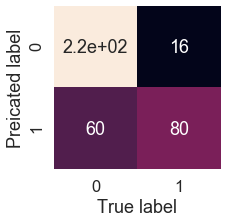

In [36]:
plot_conf_mat(confusion_matrix(Y_test_N_B, y_predicted_N_B))

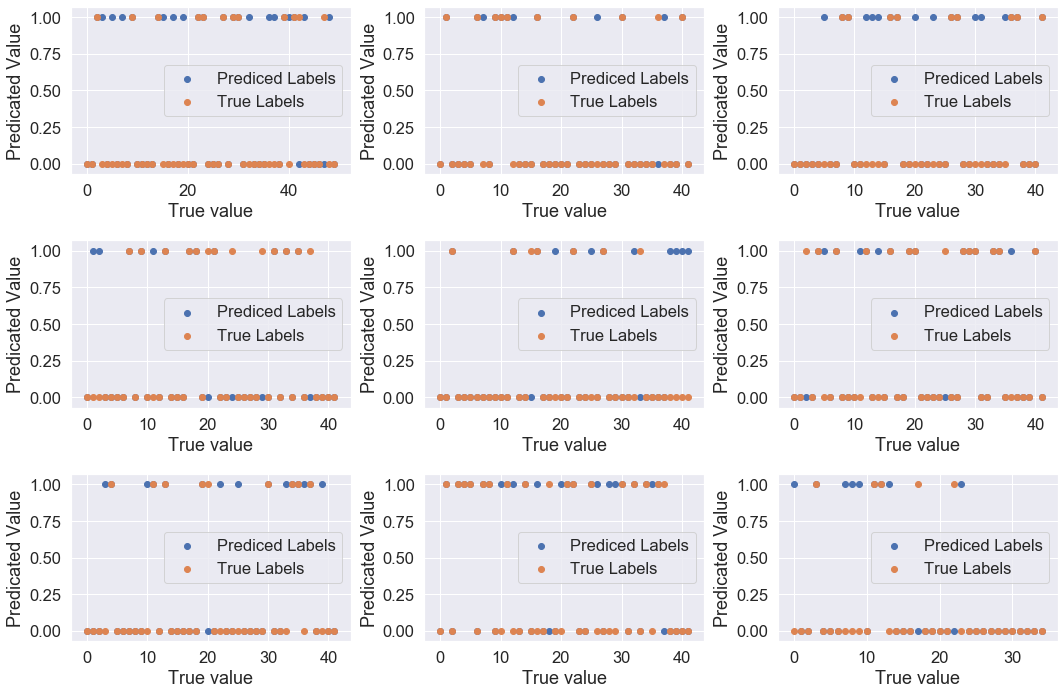

In [37]:
'''from the confusion matrix you can see that total 76 times,
we have misclassifies the output so if you count the blue dot 
in below graph: you will count 76 blue dots.'''

#
import matplotlib.pyplot as plt


# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(15,10))

a=0
b=50
# Plot the scatter plots in the first 9 subplots
for i in range(3):
    for j in range(3):
        
        axs[i, j].scatter(range(len(Y_test_N_B[a:b])), Y_test_N_B[a:b], label='Prediced Labels')
        axs[i, j].scatter(range(len(y_predicted_N_B[a:b])), y_predicted_N_B[a:b], label='True Labels')
        axs[i, j].set_xlabel("True value")
        axs[i, j].set_ylabel("Predicated Value")
        axs[i, j].legend()
        a=b
        b+=42

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [38]:
#test_data = pd.read_csv("bb_2000s_test.csv")
#test_data["Loudness"] = test_data["Loudness"].abs()

In [39]:
print("Number of features in training data:", X_train_N_B.shape[1])
print("Number of features in prediction data:", feature_NB.shape[1])

Number of features in training data: 12
Number of features in prediction data: 12


In [40]:
# change the input data to numpy array
input_data = np.asarray(test_data)
scaler = MinMaxScaler()
scaler.fit(input_data)
feature_NB = scaler.transform(input_data)
print(feature_NB.shape)
prediction_NB = model.predict(feature_NB)
print(prediction_NB)

(211, 12)
[1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1]


**K-Nearest Neighbour (KNN):**

**We chose KNN because it tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closest to the test data. **


In [41]:
feature_KN = data[['PreviousHit', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]
target_KN = data["Label"]

In [42]:
X_train_KN, X_test_KN, Y_train_KN, Y_test_KN = train_test_split(feature_KN, target_KN, test_size=0.2, random_state = 42)

In [43]:
scaler = StandardScaler()
scaler.fit(X_train_KN)
X_train_KN = scaler.transform(X_train_KN)
X_test_KN  = scaler.transform(X_test_KN)

12


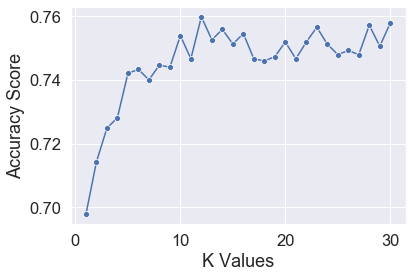

In [44]:
k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KN(n_neighbors=k)
    score = cross_val_score(knn, X_train_KN, Y_train_KN, cv=5)
    scores.append(np.mean(score))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best_index = np.argmax(scores)
best_k = k_values[best_index]
print(best_k)

Minimum error:- 0.18997361477572558 at K = 12


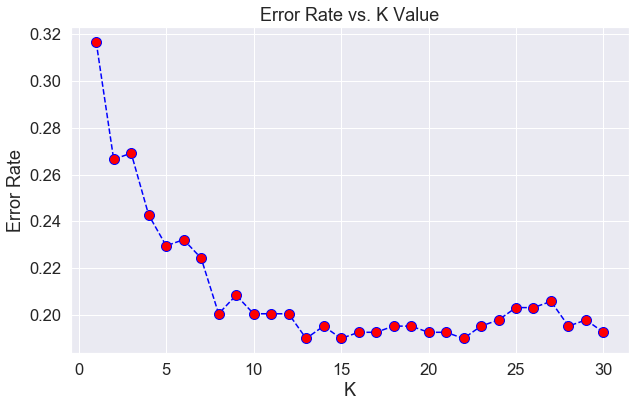

In [45]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,31):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_KN,Y_train_KN)
 pred_i = knn.predict(X_test_KN)
 error_rate.append(np.mean(pred_i != Y_test_KN))
plt.figure(figsize=(10,6))
plt.plot(range(1,31),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**In the below code, we select a range of values for k and create an empty list to store our results. We use cross-validation to find the accuracy scores, which means we don’t need to create a training and test split, but we do need to scale our data. We then loop over the values and add the scores to our list.**

**To implement cross-validation, we use scikit-learn’s cross_val_score. We pass an instance of the kNN model, along with our data and a number of splits to make. In the code below, we use five splits which means the model with split the data into five equal-sized groups and use 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which we average to find the best model**

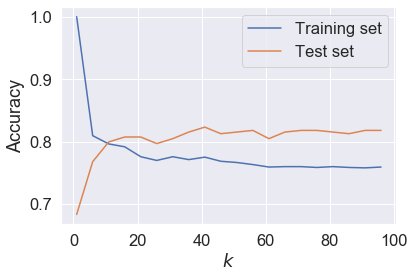

In [46]:
n_neighbors, train_scores, test_scores = [], [], []

for k in range(1, 100, 5):
    n_neighbors.append(k)
    clf = KN(n_neighbors=k)    
    clf.fit(X_train_KN, Y_train_KN)
    train_scores.append(clf.score(X_train_KN, Y_train_KN))
    test_scores.append(clf.score(X_test_KN, Y_test_KN))
    
plt.plot(n_neighbors, train_scores, label='Training set')
plt.plot(n_neighbors, test_scores, label='Test set')

plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.legend()
#print(n_neighbors)
#print(train_scores)
#print(train_scores)

**GridSearchCV**
**Grid Search is one of the most basic hyper parameter technique used and so their implementation is quite simple. All possible permutations of the hyper parameters for a particular model are used to build models. The performance of each model is evaluated and the best performing one is selected. Since GridSearchCV uses each and every combination to build and evaluate the model performance, this method is highly computational expensive. we compare this output with error rate and also try with manually search the value of k and we find that K=12 is best value to get highest valuefor the ouput (79.94%)** 

In [47]:
#We can use grid search to find the optimal k for this data set:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
param_grid = {
    'n_neighbors': np.arange(1, 100)
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_KN, Y_train_KN)

print(grid.best_params_)

{'n_neighbors': 12}


In [48]:
K_n = KN(algorithm = "kd_tree",n_neighbors=12)
K_n.fit(X_train_KN,Y_train_KN)
y_pred_KN = K_n.predict(X_test_KN)
print(accuracy_score(Y_test_KN, y_pred_KN)*100)
print(confusion_matrix(Y_test_KN, y_pred_KN))
print(classification_report(Y_test_KN, y_pred_KN))

79.94722955145119
[[211  28]
 [ 48  92]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       239
           1       0.77      0.66      0.71       140

    accuracy                           0.80       379
   macro avg       0.79      0.77      0.78       379
weighted avg       0.80      0.80      0.80       379



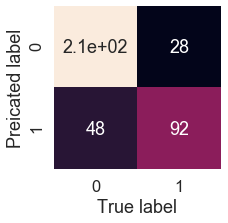

In [49]:
plot_conf_mat(confusion_matrix(Y_test_KN, y_pred_KN))  
# ploting the confusion matrix to see the mumber of false postive and false nagative 

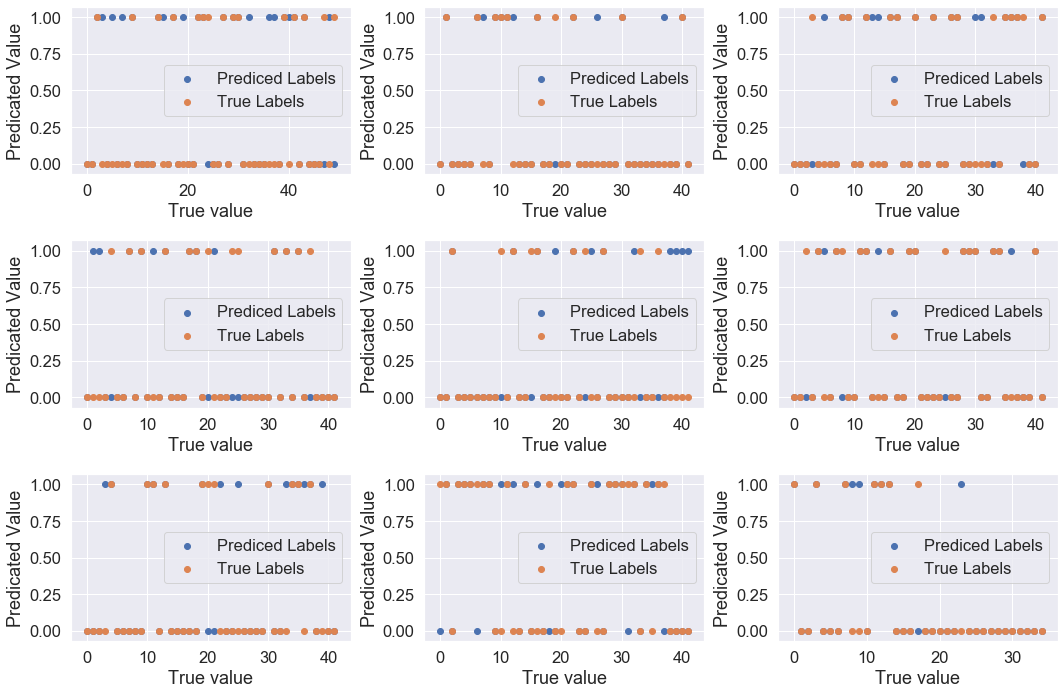

In [50]:
'''from the confusion matrix you can see that total 76 times,
we have misclassifies the output so if you count the blue dot 
in below graph: you will count 76 blue dots.'''

#
import matplotlib.pyplot as plt


# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(15,10))

a=0
b=50
# Plot the scatter plots in the first 9 subplots
for i in range(3):
    for j in range(3):
        
        axs[i, j].scatter(range(len(Y_test_KN[a:b])), Y_test_KN[a:b], label='Prediced Labels')
        axs[i, j].scatter(range(len(y_pred_KN[a:b])), y_pred_KN[a:b], label='True Labels')
        axs[i, j].set_xlabel("True value")
        axs[i, j].set_ylabel("Predicated Value")
        axs[i, j].legend()
        a=b
        b+=42

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [51]:
# change the input data to numpy array
input_data = np.asarray(test_data)
print(input_data)

# standardizing the input data
std_data_KN = scaler.transform(input_data)
#print(std_data)

prediction_KN = K_n.predict(std_data_KN)
print(prediction_KN)

[[1.00000e+00 6.63000e-01 8.21000e-01 ... 2.95000e-01 8.49000e-01
  9.80010e+01]
 [0.00000e+00 4.08000e-01 9.43000e-01 ... 3.43000e-01 1.31000e-01
  1.87526e+02]
 [0.00000e+00 6.57000e-01 9.29000e-01 ... 9.32000e-02 8.85000e-01
  9.78620e+01]
 ...
 [0.00000e+00 5.61000e-01 6.26000e-01 ... 8.79000e-02 8.57000e-01
  1.40291e+02]
 [0.00000e+00 4.87000e-01 4.43000e-01 ... 1.21000e-01 2.45000e-01
  1.21826e+02]
 [1.00000e+00 5.95000e-01 7.59000e-01 ... 2.95000e-01 7.25000e-01
  8.95740e+01]]
[1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1]


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC)
* ROC curve
ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1 

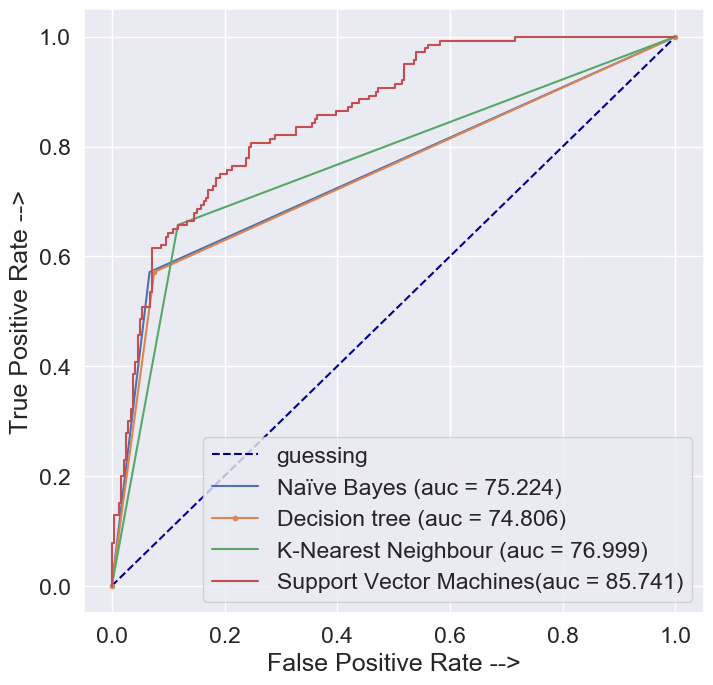

In [52]:
from sklearn.metrics import roc_curve, auc

DCT_fpr, DCT_tpr, threshold = roc_curve(Y_test_D_C, y_predicted_D_C)
auc_DCT = auc(DCT_fpr, DCT_tpr)# getting value of Decision tree for Area Under the Curve

NB_fpr, NB_tpr, threshold = roc_curve(Y_test_N_B,y_predicted_N_B)
auc_NB = auc(NB_fpr, NB_tpr)# getting value of Naïve Bayes for Area Under the Curve

#B_fpr, B_tpr, threshold = roc_curve(Y_test_NB,y_pred_B )
#auc_B = auc(B_fpr, B_tpr)# getting value of Naïve Bayesu(BernoulliNB())  for Area Under the Curve

svm_fpr, svm_tpr, threshold = roc_curve(Y_test_svm_p, y_pred_svm_p)
auc_svm = auc(svm_fpr, svm_tpr)# getting value of Support Vector Machines (SVM): for Area Under the Curve

KN_fpr, KN_tpr, threshold = roc_curve(Y_test_KN, y_pred_KN)
auc_KN = auc(KN_fpr, KN_tpr)# getting value of K-Nearest Neighbour  for Area Under the Curve


plt.figure(figsize=(8, 8), dpi=100)

#plt.plot(B_fpr, B_tpr, linestyle='-', label='BernoulliNB (auc = %0.3f)'%(auc_B*100))
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="guessing")
plt.plot(NB_fpr, NB_tpr, linestyle='-', label='Naïve Bayes (auc = %0.3f)'%(auc_NB*100))
plt.plot(DCT_fpr, DCT_tpr, marker='.', label='Decision tree (auc = %0.3f)'%(auc_DCT*100))
plt.plot(KN_fpr, KN_tpr, linestyle='-', label='K-Nearest Neighbour (auc = %0.3f)'%(auc_KN*100))
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='Support Vector Machines(auc = %0.3f)'%(auc_svm*100))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [53]:
def e_p(y_t, y_p):
    
    acc = accuracy_score(y_t, y_p)
    pre = precision_score(y_t,y_p)
    re   = recall_score(y_t,y_p)
    f1 = f1_score(y_t, y_p)
    
    metic_dict = {
        "accuracy":round(acc,2),
        "precision":round(pre,2),
        "recall":round(re,2),
        "f1":round(f1,2),
    }
    return metic_dict

svm_matrics=e_p(Y_test_svm_p, Y_pre_svm_p)
dc_matrics=e_p(Y_test_D_C, y_predicted_D_C)
NB_matrics=e_p(Y_test_N_B, y_predicted_N_B)
KN_matrics=e_p(Y_test_KN, y_pred_KN)

**Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.**

*Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.**

*F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

*Support - The number of samples each metric was calculated on.


*Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

*Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into account, so if you do have class imbalances, pay attention to this metric.

*Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

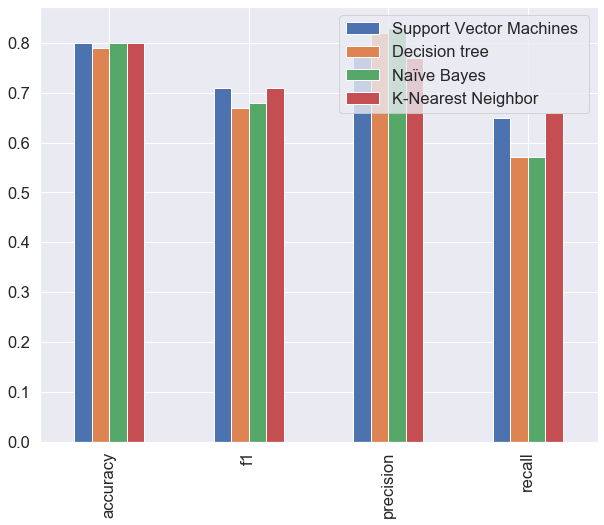

In [54]:
campare_metrics = pd.DataFrame({"Support Vector Machines ":svm_matrics,
"Decision tree":dc_matrics,
"Naïve Bayes":NB_matrics,
"K-Nearest Neighbor":KN_matrics})

campare_metrics.plot.bar(figsize=(10,8))

In [55]:
print(campare_metrics)

           Support Vector Machines   Decision tree  Naïve Bayes  \
accuracy                       0.80           0.79         0.80   
f1                             0.71           0.67         0.68   
precision                      0.78           0.82         0.83   
recall                         0.65           0.57         0.57   

           K-Nearest Neighbor  
accuracy                 0.80  
f1                       0.71  
precision                0.77  
recall                   0.66  


In [57]:
df_svm_p = pd.DataFrame(prediction_svm, columns=['Support Vector Machines'])
df_D_C = pd.DataFrame(prediction_D_C, columns=['Decision tree'])
df_NB = pd.DataFrame(prediction_NB, columns=['Naïve Bayes'])
df_KN = pd.DataFrame(prediction_KN, columns=['K-Nearest Neighbor'])

# Concatenate the DataFrames along the columns
result_df = pd.concat([df_svm_p, df_D_C, df_NB, df_KN], axis=1)

# Specify the file path where you want to save the CSV file
csv_file_path = 'predictions_PARTH_PATEL.csv'

# Save the concatenated DataFrame to a CSV file
result_df.to_csv(csv_file_path, index=False)